In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2


(2436, 2623, 3)

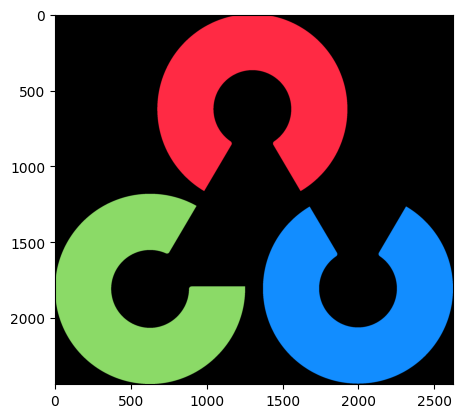

In [10]:
img = cv2.imread("../data/opencv_logo.png")
plt.imshow(img[:,:,::-1])
img.shape

In [4]:
# Convert img to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## Select the lower and upper bounds for Red, Green and Blue. 

In [5]:
# The format is H,S,V.  To keep it simple the S and V values all had the same range of 50, 255

# Red 
r_lb = np.array([165,50,50], np.uint8)
r_ub = np.array([180,255,255], np.uint8)

# Green 
g_lb = np.array([35,50,50],np.uint8)
g_ub = np.array([80,255,255],np.uint8)

# Blue
b_lb = np.array([95,50,50],np.uint8)
b_ub = np.array([125,255,255],np.uint8)


## Create Color Masks for each color

Text(0.5, 1.0, 'Blue mask, shape:(2436, 2623)')

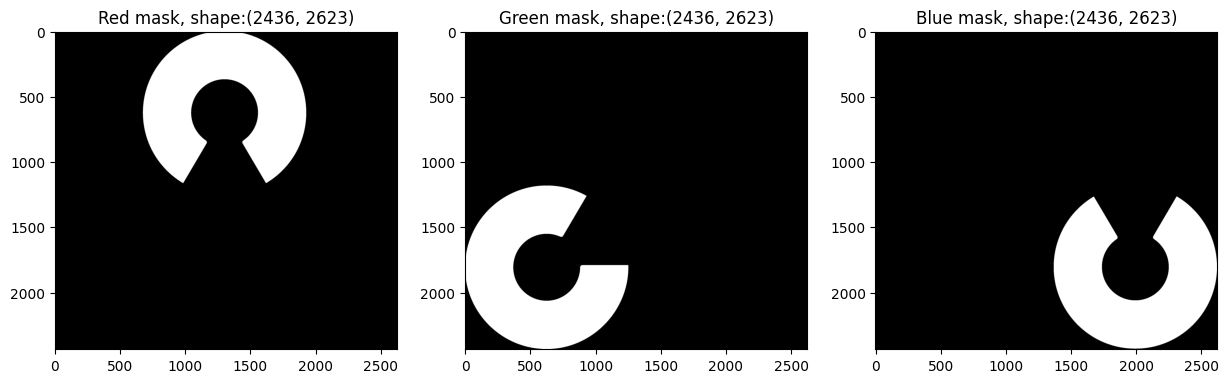

In [20]:
# Masks for red, green, and blue using the ranges from above
r_mask = cv2.inRange(img_hsv, r_lb, r_ub)
g_mask = cv2.inRange(img_hsv, g_lb, g_ub)
b_mask = cv2.inRange(img_hsv, b_lb, b_ub)

fig, ax = plt.subplots(1,3, figsize=(15,5))

# ax[0,0].imshow(img_hsv[:,:,::-1]); ax[0,0].set_title(f"HSV Img, shape:{img_hsv.shape}")
ax[0].imshow(r_mask,cmap="gray"); ax[0].set_title(f"Red mask, shape:{r_mask.shape}")
ax[1].imshow(g_mask,cmap="gray"); ax[1].set_title(f"Green mask, shape:{g_mask.shape}")
ax[2].imshow(b_mask,cmap="gray"); ax[2].set_title(f"Blue mask, shape:{b_mask.shape}")



## Segment the colors

Text(0.5, 1.0, 'Blue Segment')

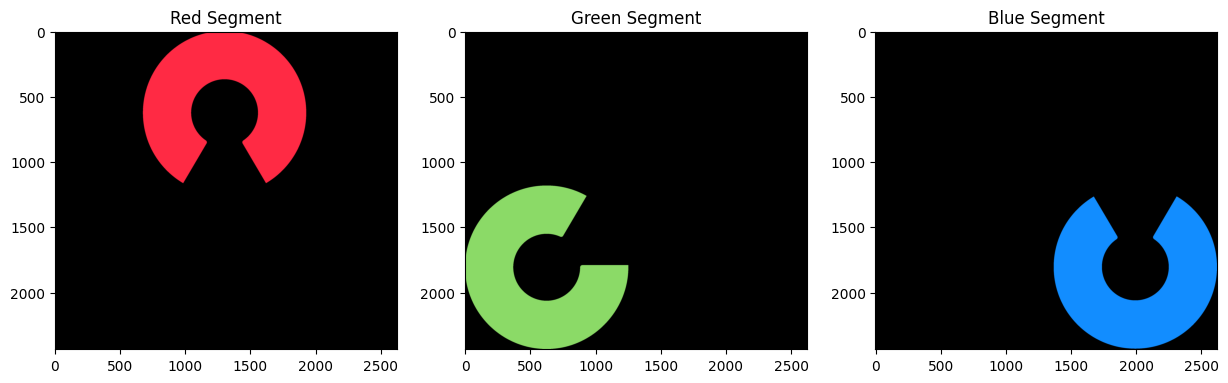

In [19]:
r_seg = cv2.bitwise_and(img, img, mask=r_mask)
g_seg = cv2.bitwise_and(img, img, mask=g_mask)
b_seg = cv2.bitwise_and(img, img, mask=b_mask)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(r_seg[:,:,::-1]); ax[0].set_title(f"Red Segment")
ax[1].imshow(g_seg[:,:,::-1]); ax[1].set_title(f"Green Segment")
ax[2].imshow(b_seg[:,:,::-1]); ax[2].set_title(f"Blue Segment")

## Practice
Segment the lake in Emerald Lake photo

(2848, 4272, 3)

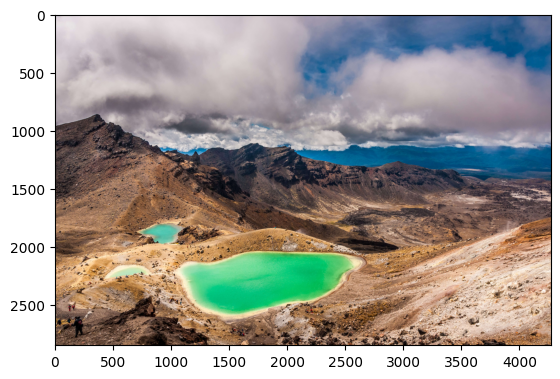

In [21]:
# Read in image
img = cv2.imread("../data/Emerald_Lakes_New_Zealand.jpg")

# Display Original Image
plt.imshow(img[:,:,::-1])

img.shape

In [24]:
# Convert to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Lower and upper bound to segment the green lakes


# Select lake in picture via slicing
color_roi = img_hsv[2100:2400, 1500:2200]

mean_hsv = np.mean(color_roi, axis=(0, 1))

print(f"Mean HSV values of the slice: H={mean_hsv[0]}, S={mean_hsv[1]}, V={mean_hsv[2]}")




Mean HSV values of the slice: H=74.8787, S=201.5090238095238, V=205.3749761904762


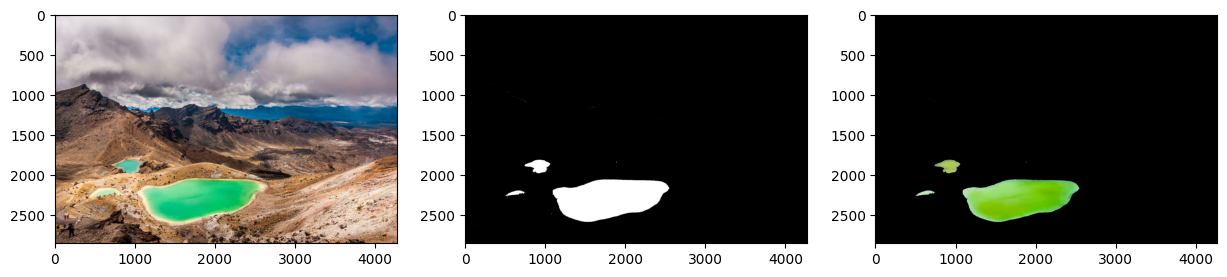

In [43]:
# Create range to capture above and below the mean:
# lb = np.array([70,195,200],np.uint8)
# ub = np.array([80,205,210],np.uint8)

lb = np.array([45,40,40],np.uint8)
ub = np.array([95,255,255],np.uint8)

# Create a green mask
mask = cv2.inRange(img_hsv, lb, ub)

# Segment Together
img_seg = cv2.bitwise_and(img,img, mask=mask)

fig, ax = plt.subplots(1,3, figsize=(15,10))
ax[0].imshow(img[:,:,::-1])
ax[1].imshow(mask, cmap="gray")
ax[2].imshow(img_seg)